# Montecarlo Simulation
The purpose of this project is to explore Montecarlo Simulation from first principles. 

We live in an uncertain world and constantly have to make certain decisions with uncertain information. Montecarlo Simulation one tool financial mathematicians can use to predict possible outcomes of an uncertain event based on some assumptions. Montecarlo Simulation is so called, because the method is based on the random nature of games of chance such as roulette or slots. It was developed by John von Neumann and Stanislaw Ulam, two physicists, as part of the Manhattan Project.

![img](C:\Users\marwi\PycharmProjects\montecarlo\img\HD.3F.191_(11239892036).jpg "John von Neumann")


![img](C:\Users\marwi\PycharmProjects\montecarlo\img\Stanislaw_Ulam.tif.jpg "Stanislaw Ulam")


We will:
1) Import the necessary data and do some initial exploratory data analysis.
2) Understand Brownian Motion from a Physics perspective.
3) Explore how we can make Geometric Brownian Motion useful in a financial setting.


## Imports
We need a few libraries to start our project - we use yfinance (Yahoo Finance) as our data provider. Pandas serves as our data manipulation tool, matplotlib.pyplot lets us visualize data and numpy lets us perform some data statistical analysis.

In [84]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

We want to fetch some data from Yahoo Finance, because we want to perform the Montecarlo Simulation for this stock at the end of the project.

In [85]:
df = yf.download('AAPL', period='5y', interval='1d')
df = pd.DataFrame(df)

[*********************100%***********************]  1 of 1 completed


In [86]:
# Let's take a look at what data we're working with
print(df.head())

Price       Adj Close      Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                                        
2019-11-22  63.447781  65.445000  65.794998  65.209999  65.647499   65325200
2019-11-25  64.560249  66.592499  66.610001  65.629997  65.677498   84020400
2019-11-26  64.056152  66.072502  66.790001  65.625000  66.735001  105207600
2019-11-27  64.916550  66.959999  66.995003  66.327499  66.394997   65235600
2019-11-29  64.773544  66.812500  67.000000  66.474998  66.650002   46617600


In [87]:
# We only need closing prices, so let's drop the columns we don't need.
df = df.drop(['Adj Close', 'Volume', 'Open', 'High', 'Low'], axis=1)
print(df.head())

Price           Close
Ticker           AAPL
Date                 
2019-11-22  65.445000
2019-11-25  66.592499
2019-11-26  66.072502
2019-11-27  66.959999
2019-11-29  66.812500


In [88]:
# Let's take a look at some basic statistics of our dataset
print(df.describe())

Price         Close
Ticker         AAPL
count   1258.000000
mean     150.434557
std       41.042536
min       56.092499
25%      126.680002
50%      150.845001
75%      176.507504
max      236.479996


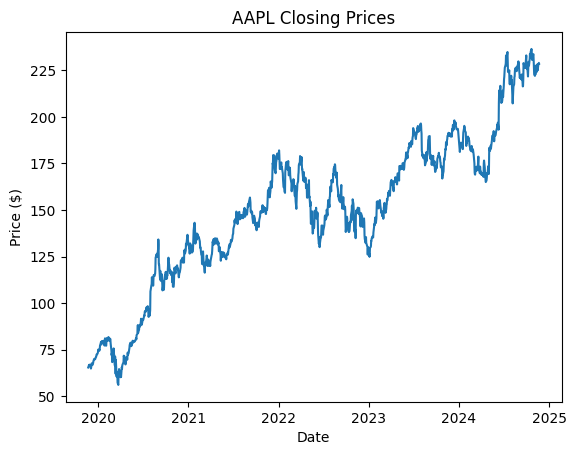

In [89]:
# Let's look at a line plot of all the downloaded Close prices of AAPL
plt.plot(df['Close'])
plt.title('AAPL Closing Prices')
plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.show()

In [90]:
# Let's perform some data preparation for the remainder of the project

# Calculate simple returns
simple_returns = df['Close'].pct_change()
simple_returns_df = pd.DataFrame(simple_returns).dropna()

# Calculate log returns
log_returns = np.log(df['Close']) - np.log(df['Close'].shift(1))
log_returns_df = pd.DataFrame(log_returns).dropna()

print(simple_returns_df.head())
print(log_returns_df.head())


Ticker          AAPL
Date                
2019-11-25  0.017534
2019-11-26 -0.007809
2019-11-27  0.013432
2019-11-29 -0.002203
2019-12-02 -0.011562
Ticker          AAPL
Date                
2019-11-25  0.017382
2019-11-26 -0.007839
2019-11-27  0.013343
2019-11-29 -0.002205
2019-12-02 -0.011630


Recap: we've downloaded some data from Yahoo Finance, performed some exploratory data analysis, removed columns we don't need, graphed closing prices, and calculated simple and log returns.

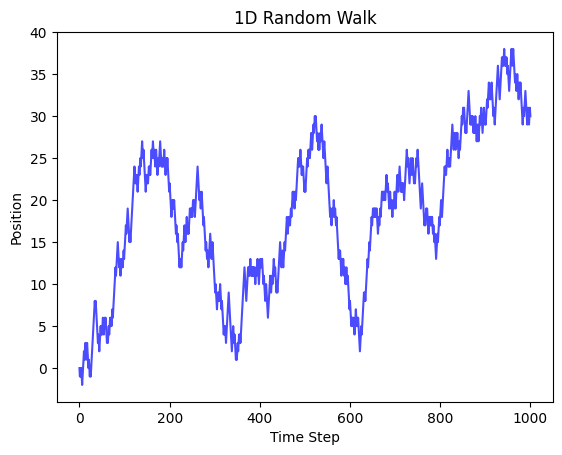

In [91]:
# Let's create a 1D random walk. You can execute this cell several times, you'll notice that you get a different path each time.

def generate_random_walk(n_steps=1000, step_size=1):
    # Generate steps (-1 or 1) with equal probability
    steps = np.random.choice([-1, 1], size=n_steps) * step_size
    
    # Compute the cumulative sum to get the position at each step
    position = np.cumsum(steps)
    
    # Include the starting point and return the result
    return np.concatenate(([0], position))

def plot_1d_random_walk():
    positions = generate_random_walk()
    time = np.arange(len(positions))
    
    plt.plot(time, positions, '-b', alpha=0.7, label='Random Walk')
    plt.title('1D Random Walk')
    plt.ylabel('Position')
    plt.xlabel('Time Step')
    plt.show()
    
plot_1d_random_walk()

Recap: above, we've explored random walks. Do they look similar to something? They look similar to our stock price time series of AAPL. Except that if we called 'Position' 'Prices', we'd realize that prices can't go negative. We'll have to make a small modification to this simulation to make it useful to a financial application.

But, before we do, let's explore where Brownian Motion actually comes from. Brownian Motion is actually a concept from Physics, formalized by the English botanist Robert Brown in 1827, when he discovered that plant pollen moved around awkwardly when suspended in water.

Albert Einstein later argued that atoms bumping into the suspended pollen could be the culprit, causing the pollen to jiggle.

So let's explore Brownian Motion in a fluid and model what Brown and Einstein once observed.

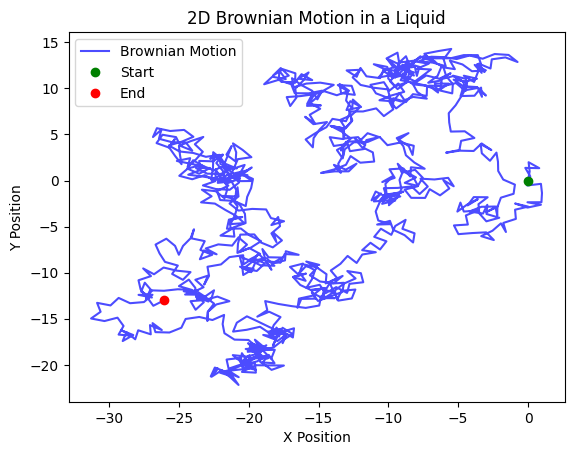

In [92]:
def generate_2d_brownian_motion(n_steps = 1000, step_size=1):
    # Generate random angles
    angles = 2 * np.pi * np.random.random(n_steps)
    # Generate x and y steps using trigonometry
    dx = step_size * np.cos(angles)
    dy = step_size * np.sin(angles)
    # Compute cumulative positions
    x = np.cumsum(dx)
    y = np.cumsum(dy)
    # Include starting point
    x = np.concatenate(([0], x))
    y = np.concatenate(([0], y))
    return x, y

def plot_2d_brownian_motion():
    x, y = generate_2d_brownian_motion()
    
    plt.plot(x, y, '-b', alpha=0.7, label='Brownian Motion')
    plt.plot(x[0], y[0], 'go', label='Start')
    plt.plot(x[-1], y[-1], 'ro', label='End')
    plt.title('2D Brownian Motion in a Liquid')
    plt.ylabel('Y Position')
    plt.xlabel('X Position')
    plt.legend()
    plt.show()
    
plot_2d_brownian_motion()

Extra: if you wanted to, you could animate the above 2D Brownian Motion

Animation saved as 'brownian_motion.gif'


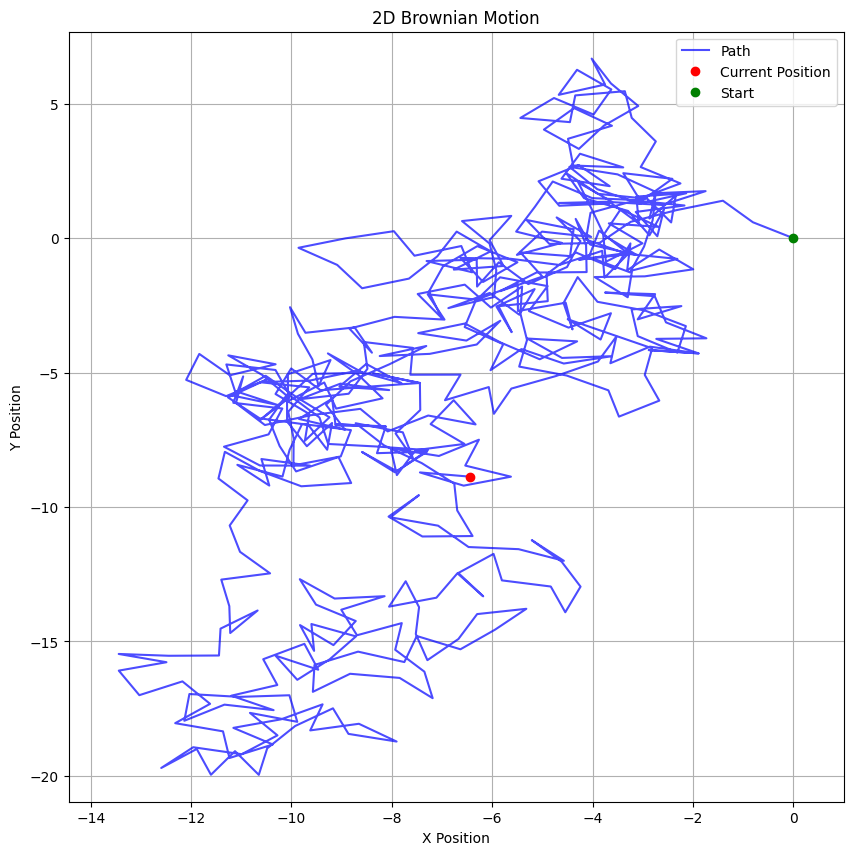

In [47]:
from matplotlib.animation import FuncAnimation, PillowWriter

def animate_2d_brownian(n_steps=1000, step_size=1, interval=20, save=True):
  """
  Create an animation of 2D Brownian motion
  n_steps: number of steps
  step_size: size of each step
  interval: time between frames in milliseconds
  save: whether to save the animation as a gif
  """
  # Generate the complete path first
  angles = 2 * np.pi * np.random.random(n_steps)
  dx = step_size * np.cos(angles)
  dy = step_size * np.sin(angles)
  x = np.cumsum(dx)
  y = np.cumsum(dy)
  x = np.concatenate(([0], x))
  y = np.concatenate(([0], y))

  # Set up the figure and animation
  fig, ax = plt.subplots(figsize=(10, 10))
  ax.set_xlim(min(x) - 1, max(x) + 1)
  ax.set_ylim(min(y) - 1, max(y) + 1)
  ax.grid(True)

  line, = ax.plot([], [], 'b-', alpha=0.7, label='Path')
  point, = ax.plot([], [], 'ro', label='Current Position')
  ax.plot(x[0], y[0], 'go', label='Start')

  # Add title and labels
  ax.set_title('2D Brownian Motion')
  ax.set_xlabel('X Position')
  ax.set_ylabel('Y Position')
  ax.legend()

  # Initialize empty data
  def init():
      line.set_data([], [])
      point.set_data([], [])
      return line, point

  # Animation function
  def animate(i):
      line.set_data(x[:i+1], y[:i+1])
      point.set_data([x[i]], [y[i]])
      return line, point

  # Create animation
  anim = FuncAnimation(fig, animate, init_func=init,
                      frames=len(x), interval=interval,
                      blit=True, repeat=False)

  if save:
      # Set up the writer
      writer = PillowWriter(fps=30)
      # Save the animation
      anim.save('brownian_motion.gif', writer=writer)
      print("Animation saved as 'brownian_motion.gif'")

  plt.show()
  return anim

# Run the animation
animate_2d_brownian(n_steps=500, step_size=1, interval=20, save=True)


Now that we know where Brownian Motion comes from, we can think about applying it to a financial markets context. As hinted above, stock prices can't be negative, so we need to ensure our 1D simulation is always strictly positive. We also know stock prices have some inherent amount of volatility - is the change from one time step to another large or small?

We have to make a few assumptions to set up our model. 
1. Basic assumptions:
    - stock prices follow a lognormal distribution
    - returns are normally distributed
    - future price movements are independent of past movements (this is called the Markov property - a mathematical "tool")
2. Mathematical context:
   The GBM equation for stock price $S$ at a time $t$ is:
   $$dS_t = \mu S_tdt + \sigma S_tdW_t$$
   Where
    - $\mu$ is the expected return (we can call it drift)
    - $\sigma$ is the volatility (we can call it wiggle)
    - $dW_t$ is our Brownian Motion (we can call it a Wiener process)

   The solution to this Stochastic Differential Equation is
   $$S_t = S_0 \times exp((\mu - \frac{\sigma^2}{2})t + \sigma W_t$$
   Note that the $exp()$ operator is just an easier way of writing Euler's number $e$ to the power of a value. The content of the brackets in $exp()$ is taken to be in the exponent of Euler's number - a cleaner way of writing the same thing.
3. Key Components of the SDE
    - Drift ($\mu$) Represents the average expected return. It is the mean of our simple returns.
    - Volatility ($\sigma$) Measures the standard deviation of returns. It is computed as the standard deviation of our log returns.

In [93]:
# Based on the above theory section, we can write a simple function which will simulate Geometric Brownian Motion.

def simulate_gbm(S0, mu, sigma, T, N, num_sims):
    dt = T/N
    paths = np.zeros((num_sims, N+1))
    paths[:, 0] = S0
    
    for t in range (1, N+1):
        z = np.random.standard_normal(num_sims)
        paths[:, t] = paths[:, t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)
    return paths
    

In [94]:
simple_returns_values = simple_returns_df.values.flatten()
log_returns_values = log_returns_df.values.flatten()

aapl_mu = np.mean(simple_returns_values)
print(f'AAPL mu: {aapl_mu}')
aapl_sigma = np.std(log_returns_values)
print(f'AAPL sigma: {aapl_sigma}')

annualized_aapl_mu = aapl_mu * 252
print(f'Anualized AAPL mu: {annualized_aapl_mu}')
annualized_aapl_sigma = aapl_sigma * np.sqrt(252)
print(f'Annualized AAPL sigma: {annualized_aapl_sigma}')


AAPL mu: 0.0011944254359175387
AAPL sigma: 0.019953226242864545
Anualized AAPL mu: 0.30099520985121975
Annualized AAPL sigma: 0.3167476469521636


Now, we have all the ingredients we need to simulate some stock price time series using Geometric Brownian Motion.

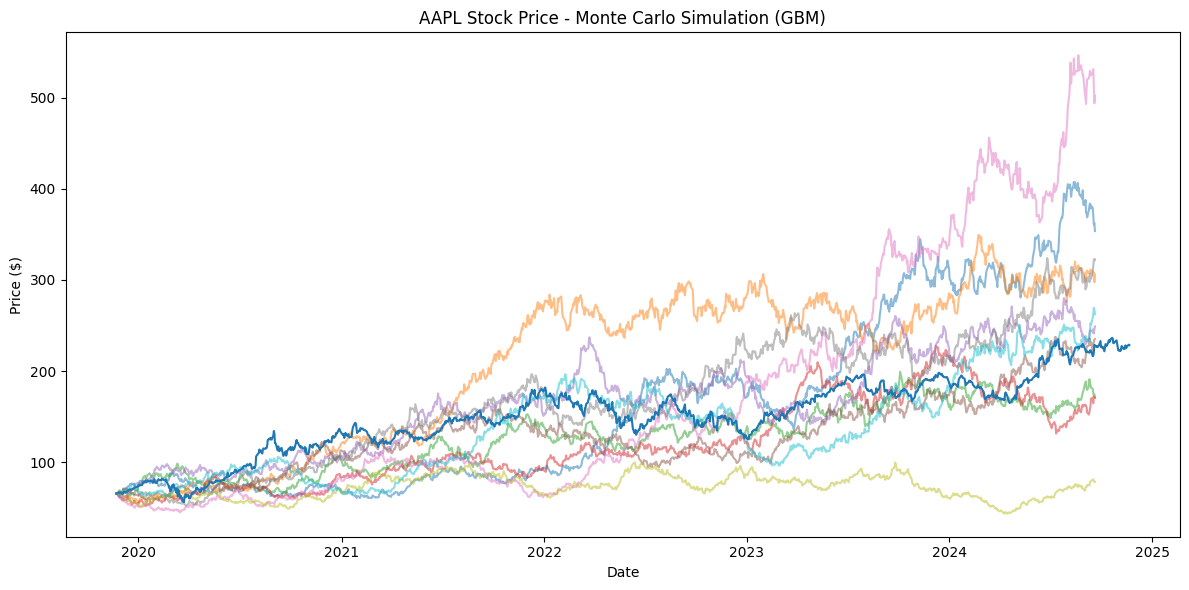

In [96]:
# Generate GBM paths
S0 = df['Close'].iloc[0]  # Initial stock price
T = 5.0  # 5 years
N = 252 * 5  # Total number of trading days (252 days/year * 5 years)
num_paths = 10

gbm_paths = simulate_gbm(S0=S0, 
                      mu=annualized_aapl_mu, 
                      sigma=annualized_aapl_sigma, 
                      T=T, 
                      N=N, 
                      num_sims=num_paths)

# Create a date index for plotting
start_date = df.index[0]
dates = pd.date_range(start=start_date, periods=N+1, freq='B')  # 'B' for business days

# Plot with proper dates and formatting
plt.figure(figsize=(12, 6))

# Plot each simulation path
for i in range(num_paths):
  plt.plot(dates, gbm_paths[i], alpha=0.5, label=f'Simulation {i+1}')

# Plot the actual historical prices for comparison
plt.plot(df.index, df['Close'], label='Historical Prices')

# Formatting
plt.title('AAPL Stock Price - Monte Carlo Simulation (GBM)')
plt.ylabel('Price ($)')
plt.xlabel('Date')

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

As you can see above, we have successfully generated several new, 'synthetic' AAPL time series over the same timeframe. The original time series is the light blue one, the new series are the slightly grey ones. If you look at the price axis, we've successfully solved the issue of our price paths becoming negative. They are now always strictly positive, more similar to the behavior of a stock.

You could now take this a step further and use, say, minute granularity data, run one Monte Carlo Simulation, look at 60-minute chunks and get the highest, lowest, and last entries in one 60-minute chunk and ta-da! You have created your own, synthetic market data. 

Synthetic market data can be useful if real data is scarce or excessively expensive.